# Teoría del Error
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>
<style type="text/css">
    .formula {
        background: #f7f7f7;
        border-radius: 50px;
        padding: 15px;
    }
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>


## Datos y variables 
Una variable se utiliza para designar una cantidad susceptible de tomar distintos valores numéricos dentro de un conjunto de números especificado.

## Agenda
1. Tipos de variables
1. Operaciones con variables
1. Modelos de datos

In [1]:
# Importando módulos al cuaderno de Jupyter
import math as m 
import numpy as np
import pylab as plt
import statistics as st

## 1. Tipos de variables
---
En matemáticas, estadística y ciencias experimentales, suele hacerse la distinción entre variables independientes y variables dependientes; siendo la variable independiente aquella que toma cualquier valor en el conjunto de partida, modificando el valor de las variables dependientes en el conjunto de salida. En la ecuación <code>y</code> representa la variable dependiente y las <code>x</code> las variables independientes.

\begin{equation*}
y = f(x_1, x_2, ... , x_n) \\
\end{equation*}

### <code>Ejemplo:</code> Caída Libre
---
Cálculo de la altura en funcion del tiempo <code>Y(t)</code> de un objeto en caida libre sometido a la aceleracion constante de la gravedad <code>\[g\]</code>, a partir de una altura inicial.

--------------------------------------
 Tiempo t1:         -1.427
 Tiempo t2:          1.427
--------------------------------------


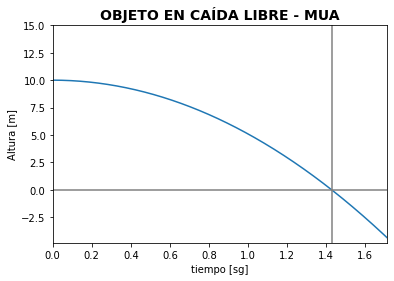

In [2]:
# Respuesta del sistema (Objeto en caída libre) 
# ------------------------------------------------------------
# Constantes
gt = 9.8179     # Gravedad tierra
Vo = 0          # Velocidad Inicial
Yo = 10         # Altura h

# Tiempo de llegada (Raíces de la ecuación, Y = 0)
# y_t = -(1/2)*gt*t**2 + Vo * t + Yo
# 0 = -(1/2)*gt*t**2 + Vo * t + Yo
# (-b ± √(b^2 - 4*a*c)) / 2*a
a = -(1/2)*gt
b = Vo
c = Yo
# Raíces de la ecuación
t1 = (- b + (b**2-4*a*c)**(1/2)) / (2*a)
t2 = (- b - (b**2-4*a*c)**(1/2)) / (2*a)

# Vector de tiempo (de 0 a 10 sg) - Variable independiente
t = np.linspace(0, 1.2*abs(t1), 512, endpoint=True)

# Calculo de la posición en el tiempo - Variable dependiente
y_t = -(1/2)*gt*t**2 + Vo * t + Yo

# Salida estándar
print(f"--------------------------------------")
print(f" Tiempo t1:        {t1:7.3f}")
print(f" Tiempo t2:        {t2:7.3f}")
print(f"--------------------------------------")

# Gráfica en el plano de el cambio de la variable dependiente con el cambio de la variable independiente
plt.plot(t, y_t)
plt.xlim(t.min(), t.max())
plt.ylim(y_t.min()*1.1, y_t.max()*1.5)

# Lineas horizontales y verticales 
plt.axvline(x = abs(t1), color="gray")
plt.axhline(y = 0, color="gray")

# Textos que aparecen en la gráfica
plt.title("Objeto en caída libre - MUA".upper(), fontsize=14, fontweight="bold")
plt.xlabel("tiempo [sg]")
plt.ylabel("Altura [m]")
plt.show()


## 2. Operaciones con variables
---
Para ampliar o transformar la información observada directamente, se obtienen indirectamente otras cantidades operando sobre los datos obtenidos por medida directa; Esto es que dados <code>n</code> valores obtenidos directamente $ \left\{x_1, x_2, ... , x_n \right\}$ algunas de las cantidades indirectas más comunes son:

* _Media Aritmética:_ En matemáticas, la media o promedio \[_μ_\], se obtiene a partir de la suma de todos los valores en un conjunto dividida entre el número de elementos sumados.

\begin{align}
\mu & =  \frac{1}{n} \sum_{1}^n x_i \\
\end{align}

* _Varianza:_ En probabilidad, la varianza \[_σ²_\] de una variable aleatoria, es una medida de dispersión de un conjunto de datos y se expresa como la suma de los cuadrados de la diferencia de cada valor del promedio.

\begin{align}
\sigma^2 & = \frac{1}{n} \sum_{1}^n \left( \mu - x_i \right)^2 \\
\end{align}

* _Desviación estándar:_ En estadística, la desviación típica \[_σ_\], es una medida que se utiliza para cuantificar la variación o la dispersión de un conjunto de datos numéricos.

\begin{align}
\sigma & = \sqrt{ \frac{1}{n} \sum_{1}^n \left( \mu - x_i \right)^2 } \\
\end{align}

>**NOTA:** Es importante resaltar que las medidas de varianza y desviación típica \[_σ²,σ_\] definidas para una población difieren de los valores de varianza y desviación definidos para una muestra de esa poblacion como \[_s²,s_\].


In [3]:
# Sea Tr un conjunto de 10 Medidas directas, calcular:
Tr = [2.106, 2.101, 2.098, 2.087, 2.073, 2.070, 2.064, 2.059, 2.057, 2.052]

# Conversión (Casting) de la variable, de lista a un array de NumPy 
T = np.array(Tr)

# Media aritmética (Promedio - μ)
μ_1_T = sum(T) / len(T)
μ_2_T = st.mean(T)

# Varianza (Variancia - σ²)
σ2_1_T = (1 / len(T)) * sum((μ_1_T - T)**2)
σ2_2_T = st.variance(T)

# Desviación típica (desviación - σ)
σ_1_T = m.sqrt((1 / len(T)) * sum((μ_1_T - T)**2))
σ_2_T = st.stdev(T)


# Salida estándar
print(f"--------------------------------------")
print(f" Número de Valores:  {len(T):4.0f}")
print(f"--------------------------------------")
print(f" Valor mínimo:       {min(T):8.4f}")
print(f" Valor máximo:       {max(T):8.4f}")
print(f"--------------------------------------")
print(f"| MEDIDA     |    NUMPY | STATISTICS |")
print(f"--------------------------------------")
print(f"| Promedio   | {μ_1_T:8.6f} | {μ_2_T:10.6f} |")
print(f"| Varianza   | {σ2_1_T:8.6f} | {σ2_2_T:10.6f} |")
print(f"| Desviación | {σ_1_T:8.6f} | {σ_2_T:10.6f} |")
print(f"--------------------------------------")


--------------------------------------
 Número de Valores:    10
--------------------------------------
 Valor mínimo:         2.0520
 Valor máximo:         2.1060
--------------------------------------
| MEDIDA     |    NUMPY | STATISTICS |
--------------------------------------
| Promedio   | 2.076700 |   2.076700 |
| Varianza   | 0.000354 |   0.000393 |
| Desviación | 0.018815 |   0.019833 |
--------------------------------------


## 3. Modelos de datos
---
* _**Modelos Conceptuales:**_ En ellos, se representa los supuestos de un fenómeno; incluyendo los conceptos asociados y sus relaciones.


* _**Modelos Matemáticos:**_ En ellos, se estudia el cambio de la variable dependiente a medida que cambian las variables independientes.
    * _Modelos deterministas:_ Aquellos en los cuales se asume que los datos y los fenómenos son completamente conocidos.
    * _Modelos estocásticos:_ Aquellos en los cuales se asume que los datos y los fenómenos son aleatorios.


* _**Modelos de Simulación:**_ En ellos, la variable dependiente se modifica en respuesta a los cambios en las variables independientes.
    * _Modelos Numéricos:_ Aquellos en los cuales los datos, los fenómenos y las condiciones iniciales se representan mediante un conjunto de números; estos se obtienen por medida directa del fenómeno o por discretización de los modelos algebraicos.
    * _Modelos iterativos:_ Aquellos en los cuales se utiliza ordenadores con el propósito de resolver las ecuaciones de un modelo matemático no de forma analítica sino numérica.


![attenuation](img/model.png)

---
## Mas Recursos

- [Variable](https://es.wikipedia.org/wiki/Variable_(matem%C3%A1ticas)) (Wikipedia)
- [Media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) (Wikipedia)
- [Varianza](https://es.wikipedia.org/wiki/Varianza) (Wikipedia)
- [Desviación típica](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica) (Wikipedia)
- [Modelo matemático](https://es.wikipedia.org/wiki/Modelo_matem%C3%A1tico) (Wikipedia)
- [Modelado numérico](https://es.wikipedia.org/wiki/Modelado_num%C3%A9rico) (Wikipedia)
- [Discretización](https://es.wikipedia.org/wiki/Discretizaci%C3%B3n) (Wikipedia)
